In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import check_random_state

# Data Preparation

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(np.shape(X), np.shape(y))

y = list(map(int, y))
y = list(map(lambda x: x > 4, y))
y = list(map(int, y))
y = np.array(y)

n_train = 6500
n_valid = 500
n_test = len(X) - n_train - n_valid

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_valid_tmp, y_train, y_valid_tmp = train_test_split(
    X, y, train_size=n_train)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid_tmp, y_valid_tmp, train_size=n_valid)

print(np.shape(X_train), np.shape(X_valid), np.shape(X_test))
print(np.shape(y_train), np.shape(y_valid), np.shape(y_test))

scaler = StandardScaler() # MinMaxScaler() performs worse
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(70000, 784) (70000,)
(6500, 784) (500, 784) (63000, 784)
(6500,) (500,) (63000,)


# SAGA with L1

Test score: 0.6780


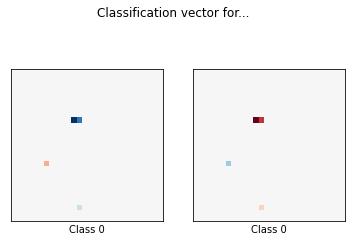

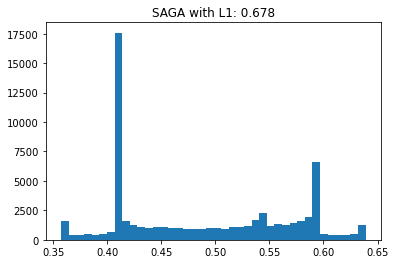

Test score: 0.8540


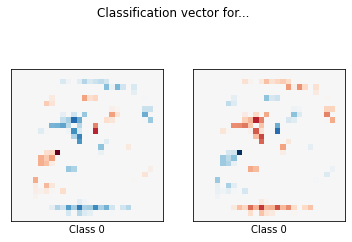

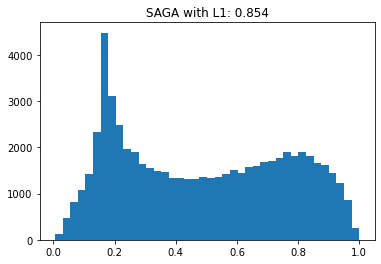

Test score: 0.8720


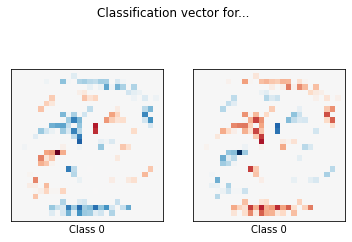

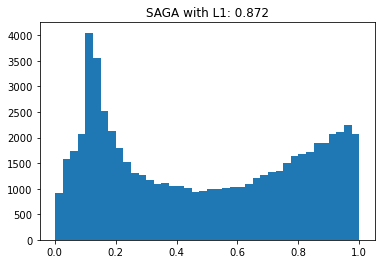

Test score: 0.8800


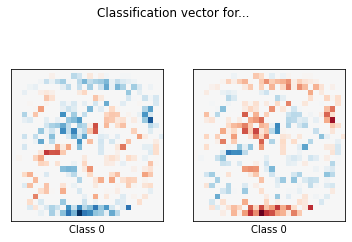

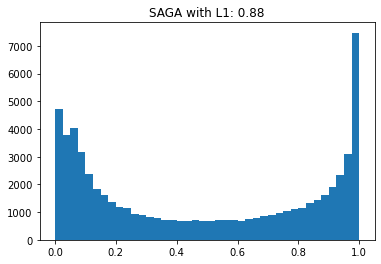

In [29]:
for const in [10., 50., 100., 500.]:

    clf = LogisticRegression(solver='saga', penalty='l1', C=const / n_train, tol=0.001, max_iter=10000)
    clf.fit(X_train, y_train)

    sparsity = np.mean(clf.coef_ == 0) * 100
    score = clf.score(X_valid, y_valid)
    print("Test score: %.4f" % score)

    coef = clf.coef_.copy()
    scale = np.abs(coef).max()
    fig, ax = plt.subplots(1, 2, sharex=True)
    ax[0].imshow(coef.reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    ax[1].imshow((coef * -1).reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_xlabel('Class 0')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_xlabel('Class 0')
    plt.suptitle('Classification vector for...')
    plt.show()
    
    plt.hist(clf.predict_proba(X_test)[:, 1], bins=40)
    plt.title("SAGA with L1: " + str(score))
    plt.show()

# SAGA without L1

Test score: 0.8920


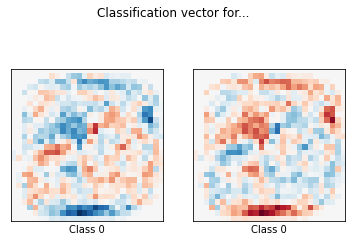

In [5]:
clf = LogisticRegression(solver='saga', tol=0.01, max_iter=10000)
clf.fit(X_train, y_train)

sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_valid, y_valid)
print("Test score: %.4f" % score)

coef = clf.coef_.copy()
scale = np.abs(coef).max()
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].imshow(coef.reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[1].imshow((coef * -1).reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_xlabel('Class 0')
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_xlabel('Class 0')
plt.suptitle('Classification vector for...')
plt.show()

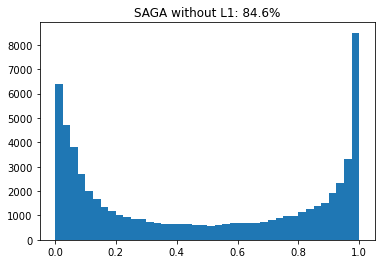

In [6]:
plt.hist(clf.predict_proba(X_test)[:, 1], bins=40)
plt.title("SAGA without L1: " + str(score))
plt.show()

# LBFGS with L2

Test score: 0.8880


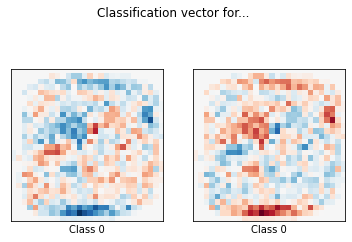

In [7]:
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=50./n_train, tol=0.01, max_iter=10000)
clf.fit(X_train, y_train)

sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_valid, y_valid)
print("Test score: %.4f" % score)

coef = clf.coef_.copy()
scale = np.abs(coef).max()
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].imshow(coef.reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[1].imshow((coef * -1).reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_xlabel('Class 0')
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_xlabel('Class 0')
plt.suptitle('Classification vector for...')
plt.show()

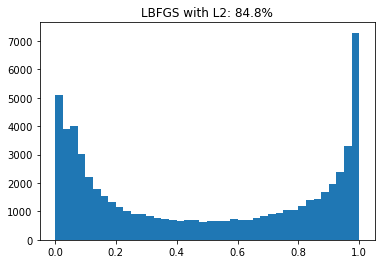

In [8]:
plt.hist(clf.predict_proba(X_test)[:, 1], bins=40)
plt.title("LBFGS with L2: " + str(score))
plt.show()

# LBFGS without L2

Test score: 0.8660


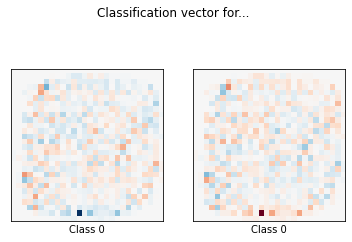

In [9]:
clf = LogisticRegression(solver='lbfgs', tol=0.01, max_iter=10000)
clf.fit(X_train, y_train)

sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_valid, y_valid)
print("Test score: %.4f" % score)

coef = clf.coef_.copy()
scale = np.abs(coef).max()
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].imshow(coef.reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[1].imshow((coef * -1).reshape(28, 28), interpolation='nearest',
               cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_xlabel('Class 0')
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_xlabel('Class 0')
plt.suptitle('Classification vector for...')
plt.show()

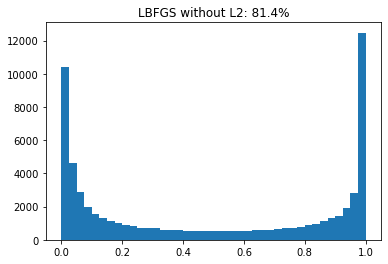

In [10]:
plt.hist(clf.predict_proba(X_test)[:, 1], bins=40)
plt.title("LBFGS without L2: " + str(score))
plt.show()